In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

X_train = X_train / 255.0
X_dev = X_dev / 255.0

In [9]:
def init_params():
    W1 = np.random.randn(100, 784) * 0.01
    b1 = np.zeros((100, 1))                  
    W2 = np.random.randn(10, 100) * 0.01     
    b2 = np.zeros((10, 1))                   
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
     return np.exp(Z) / np.sum(np.exp(Z), axis=0)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [10]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if(i % 10 == 0):
            print("iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

iteration:  0
[5 5 5 ... 5 9 0] [4 4 4 ... 1 2 7]
Accuracy:  0.07865853658536585
iteration:  10
[3 3 7 ... 1 3 7] [4 4 4 ... 1 2 7]
Accuracy:  0.35241463414634144
iteration:  20
[3 3 3 ... 1 3 7] [4 4 4 ... 1 2 7]
Accuracy:  0.3788780487804878
iteration:  30
[3 3 3 ... 1 3 7] [4 4 4 ... 1 2 7]
Accuracy:  0.3722682926829268
iteration:  40
[7 3 7 ... 1 3 7] [4 4 4 ... 1 2 7]
Accuracy:  0.3854878048780488
iteration:  50
[7 7 9 ... 1 3 7] [4 4 4 ... 1 2 7]
Accuracy:  0.45326829268292684
iteration:  60
[7 7 9 ... 1 3 7] [4 4 4 ... 1 2 7]
Accuracy:  0.5682682926829268
iteration:  70
[9 9 9 ... 1 3 7] [4 4 4 ... 1 2 7]
Accuracy:  0.6582926829268293
iteration:  80
[9 9 9 ... 1 3 7] [4 4 4 ... 1 2 7]
Accuracy:  0.7053414634146341
iteration:  90
[9 9 9 ... 1 3 7] [4 4 4 ... 1 2 7]
Accuracy:  0.7426829268292683
iteration:  100
[9 9 9 ... 1 2 7] [4 4 4 ... 1 2 7]
Accuracy:  0.7705853658536586
iteration:  110
[9 9 9 ... 1 2 7] [4 4 4 ... 1 2 7]
Accuracy:  0.7899512195121952
iteration:  120
[9 9 9 .

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


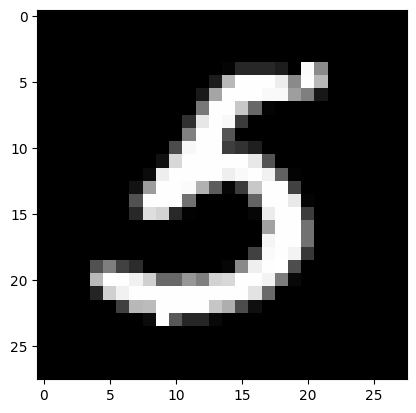

In [13]:
test_prediction(520, W1, b1, W2, b2) 

Prediction:  [6]
Label:  6


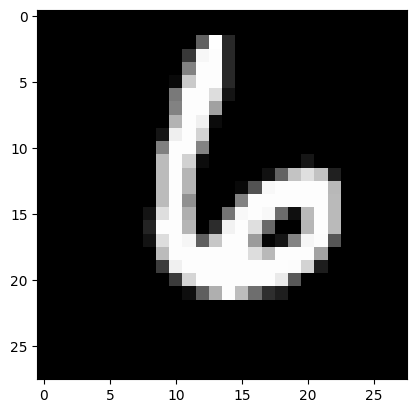

In [15]:
test_prediction(250, W1, b1, W2, b2) 

Prediction:  [0]
Label:  0


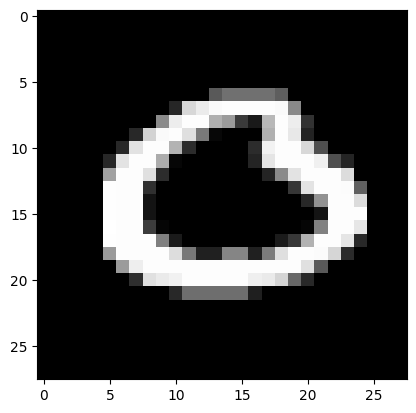

In [16]:
test_prediction(300, W1, b1, W2, b2) 

Prediction:  [1]
Label:  1


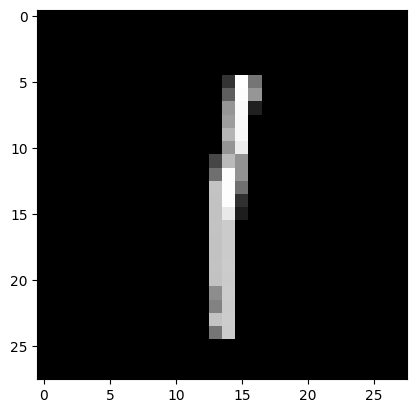

In [19]:
test_prediction(1250, W1, b1, W2, b2) 